## To perform text mining using textblob in python 
(TF-IDF generation, sentiment 
analysis, word-cloud, POS tagging)

In [1]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ----------- ---------------------------- 174.1/624.3 kB 5.3 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/624.3 kB 6.7 MB/s eta 0:00:01
   ---------------------------------------  614.4/624.3 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB 8.6 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.5 MB 8.0 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.5 MB 7.9 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.5 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninsta

In [2]:
from textblob import TextBlob
from textblob import download_corpora

In [3]:
blob = TextBlob('''DDU is thE bEsTt univercity''')
blob2 = TextBlob('''speling mustake''')

In [4]:
blob.correct()

TextBlob("DDU is the best university")

In [5]:
blob2.correct()

TextBlob("spelling mistake")

## TFIDF
- TF: Term Frequency (no. of word repetition)
- DF: Document Frequency (no. of docs containing the word)
- IDF: Inverse DF (rare but imp words, hence given more weight)

In [6]:
!pip install nltk

In [10]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     UNEXPECTED_EOF_WHILE_READING] EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1006)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     UNEXPECTED_EOF_WHILE_READING] EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1006)>


# Sentiment Analysis

In [15]:
import pandas as pd
df=pd.read_csv("dataset.csv") #total 8 emotions
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [13]:
!pip install neattext

   ---------------------------------------- 0.0/114.7 kB ? eta -:--:--
   ---------------------------------------  112.6/114.7 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 114.7/114.7 kB 1.7 MB/s eta 0:00:00


In [14]:
import numpy as np
import neattext.functions as nfx
import seaborn as sns
import matplotlib.pyplot as plt

## Data understanding, visualization and cleaning

In [16]:
df.describe()

,Emotion,Text
count,34792,34792
unique,8,31105
top,joy,Yes .
freq,11045,76


In [18]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [19]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

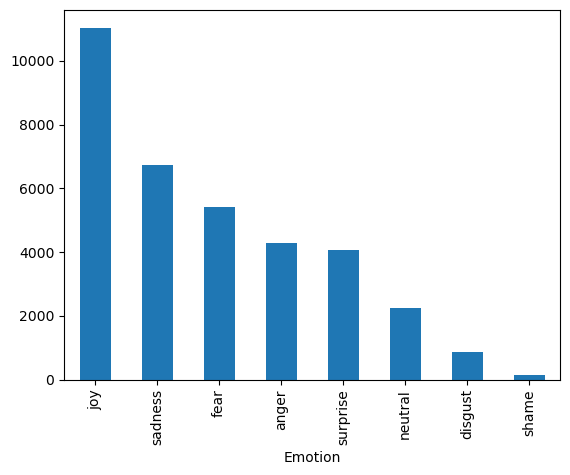

In [20]:
df['Emotion'].value_counts().plot(kind='bar')

In [21]:
from textblob import TextBlob

In [22]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = 'Positive'
    elif sentiment < 0:
        result = 'Negative'
    else: 
        result = 'Neutral'
    return result

In [23]:
get_sentiment('I was late to my class')

'Negative'

In [24]:
get_sentiment('I was early to my class')

'Positive'

In [25]:
get_sentiment('I was on time to my class')

'Neutral'

In [28]:
get_sentiment('My friend got me a gift')

'Neutral'

In [32]:
get_sentiment('My friend got me my first class result')

'Positive'

In [33]:
get_sentiment('My friend got me my distinction result')

'Neutral'

In [34]:
get_sentiment('My friend got me my pass class result')

'Neutral'

In [35]:
df['Sentiment']=df['Text'].apply(get_sentiment)
df.head(10)

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral
5,fear,I'm expecting an extremely important phonecall...,Positive
6,sadness,.Couldnt wait to see them live. If missing th...,Negative
7,surprise,maken Tip 2: Stop op een moment dat je het hel...,Neutral
8,surprise,En dan krijg je ff een cadeautje van een tweep...,Neutral
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,Neutral


In [36]:
#comparision
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      324
          Neutral       251
          Positive      281
fear      Negative     1534
          Neutral      1844
          Positive     2032
joy       Negative     1682
          Neutral      3649
          Positive     5714
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2629
          Neutral      2128
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

Text(0.5, 1.0, 'Predicted Emotion')

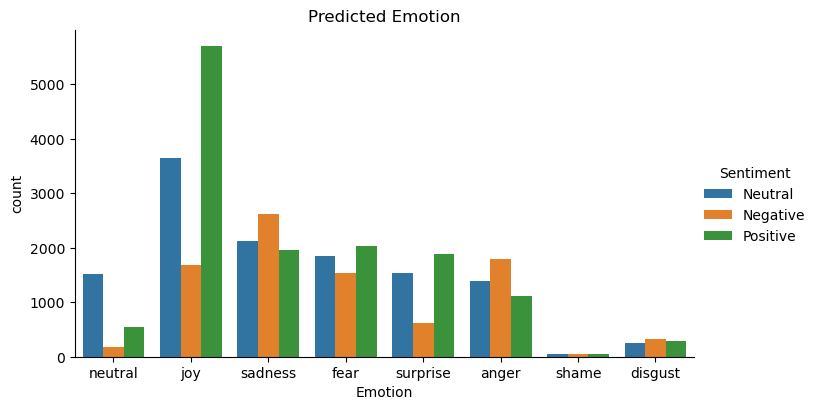

In [46]:
sns.catplot(x='Emotion', hue='Sentiment', data=df, kind='count', height=4, aspect=1.8)
plt.title("Predicted Emotion")

In [47]:
#data cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [48]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [49]:
df['Clean_text'] = df['Text'].apply(nfx.remove_stopwords)

In [50]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_punctuations)

In [51]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_userhandles)

In [52]:
df[['Text','Clean_text']]

,Text,Clean_text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [53]:
from collections import Counter

def extract_keywords(text, num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [55]:
emotion_list = df['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [56]:
joy_list = df[df['Emotion']=='joy']['Clean_text'].tolist()
joy_list

['Sage Act upgrade list tommorow',
 'eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness ',
 '  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang',
 'life  Leopold truly happy : hopes prayers beloved son come fruition ',
 'feeling fail french #fuckfrench',
 'GoodLet  ',
 'fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile',
 'terribly ecstatic dangerous thing ',
 'selected study university',
 'Yeah  ’ ages  ',
 'passed BA exams class results',
 'heard selected fot year university Zambia form Chikola secondary school',
 'Welp time study days',
 'Heading campus rain grad photos',
 'feeling awesome ',
 '  brings  Ive bought Christmas presents trawl loads shops :)',
 'shit pants Pure 100% gravy',
 'life  Leopold

In [57]:
joy_docx = ''.join(joy_list)
joy_docx

'Sage Act upgrade list tommoroweye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness   ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko anglife  Leopold truly happy : hopes prayers beloved son come fruition feeling fail french #fuckfrenchGoodLet  fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhileterribly ecstatic dangerous thing selected study universityYeah  ’ ages  passed BA exams class resultsheard selected fot year university Zambia form Chikola secondary schoolWelp time study daysHeading campus rain grad photosfeeling awesome   brings  Ive bought Christmas presents trawl loads shops :)shit pants Pure 100% gravylife  Leopold truly happy : hopes prayers beloved son come fruition Class jamming paper quarter rea

In [58]:
keyword_joy = extract_keywords(joy_docx)
keyword_joy

{'amp': 652,
 'day': 582,
 'time': 468,
 'Im': 453,
 'like': 439,
 'work': 400,
 'Christmas': 370,
 'today': 318,
 'good': 312,
 'tomorrow': 304,
 'happy': 303,
 'love': 283,
 'going': 283,
 'night': 249,
 'got': 248,
 'home': 248,
 'school': 233,
 '2': 232,
 'morning': 225,
 'joy': 214,
 'life': 208,
 'hours': 201,
 'feel': 193,
 'year': 183,
 'people': 179,
 'long': 178,
 's': 176,
 'new': 172,
 'great': 168,
 'days': 166,
 'week': 163,
 'sleep': 158,
 'know': 158,
 'family': 157,
 'RT': 156,
 'hour': 152,
 'God': 143,
 ':)': 143,
 'cant': 137,
 'excited': 135,
 'tonight': 134,
 'friends': 128,
 'feeling': 126,
 'felt': 126,
 'friend': 126,
 'right': 124,
 '3': 123,
 'old': 121,
 'me': 121,
 'think': 119}

## WORD CLOUD

In [59]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/299.9 kB 2.6 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/299.9 kB 2.1 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/299.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 1.8 MB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 925.5 kB/s eta 0:00:00


In [70]:
from wordcloud import WordCloud

def plot_cloud(docx):
    myWC = WordCloud(background_color='white').generate(docx)
    plt.figure(figsize=(25,20))
    plt.imshow(myWC, interpolation='bilinear')
    plt.axis('off')
    plt.show()

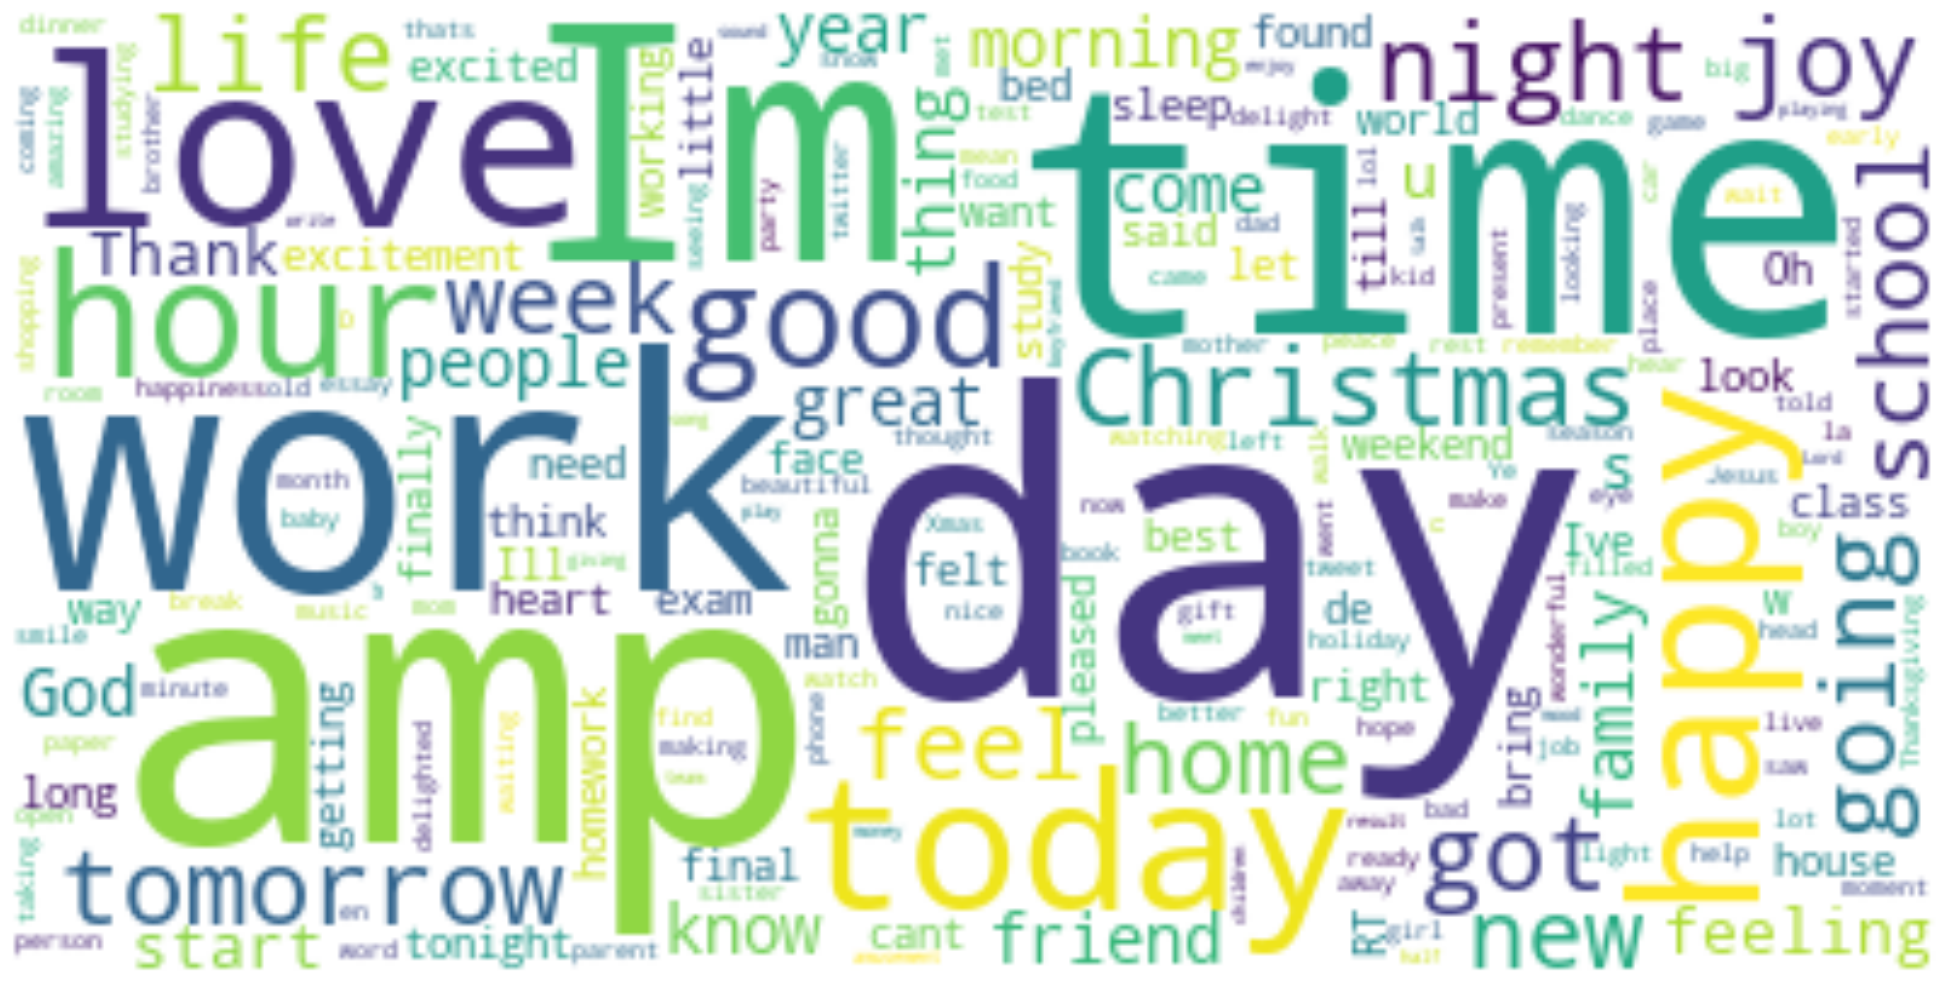

In [71]:
plot_cloud(joy_docx)